### Importing Python Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Loading the data

In [ ]:
# Mount Google drive with Google Colab# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="Latin", header=None)
data.columns = ["label", "time", "date", "query", "username", "text"]

Mounted at /content/drive
/content/drive/MyDrive/Github


### Exploratory Data

#### Five top records of data

In [ ]:
data.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Five last records of data

In [ ]:
data.tail()

,label,time,date,query,username,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


#### Coloumns/features in data

In [ ]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [ ]:
print('lenght of data is', len(data))

lenght of data is 1600000


#### Shape of data

In [ ]:
data.shape

(1600000, 6)

#### Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   time      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#### Data types of all coloumns

In [ ]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [ ]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [ ]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   1600000


### Data Preparation

#### Selecting the text and label coloumn

In [ ]:
data=data[['text','label']]

#### Assigning 1 to Positive sentment 4

In [ ]:
data['label'][data['label']==4]=1

#### Making statement text in lower case

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [ ]:
stopwords_list = stopwords.words('english')
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

#### Cleaning and removing punctuations 

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

1599995                     woke up school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

1599995                       woke up schol best feling ever
1599996    thewdbcom col hear old walt interviews â« htp...
1599997                      ready mojo makeover ask details
1599998     hapy 38th birthday bo al time tupac amaru shakur
1599999    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

#### Cleaning and removing email

In [ ]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

1599995                       woke up schol best feling ever
1599996    thewdbcom col hear old walt interviews â« htp...
1599997                      ready mojo makeover ask details
1599998     hapy 38th birthday bo al time tupac amaru shakur
1599999    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

#### Cleaning and removing URL's

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

1599995                       woke up schol best feling ever
1599996    thewdbcom col hear old walt interviews â« htp...
1599997                      ready mojo makeover ask details
1599998     hapy 38th birthday bo al time tupac amaru shakur
1599999    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

1599995                       woke up schol best feling ever
1599996    thewdbcom col hear old walt interviews â« htp...
1599997                      ready mojo makeover ask details
1599998       hapy th birthday bo al time tupac amaru shakur
1599999    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
data['text'].head()

0    [switchfot, htptwitpicomyzl, aw, thats, bumer,...
1    [upset, cant, update, facebok, texting, it, mi...
2    [kenichan, dived, many, times, bal, managed, s...
3               [whole, body, fels, itchy, like, fire]
4    [nationwideclas, no, behaving, al, im, mad, he...
Name: text, dtype: object

#### Applying Stemming

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

0    [switchfot, htptwitpicomyzl, aw, that, bumer, ...
1    [upset, cant, updat, facebok, text, it, might,...
2    [kenichan, dive, mani, time, bal, manag, save,...
3                [whole, bodi, fel, itchi, like, fire]
4    [nationwidecla, no, behav, al, im, mad, here, ...
Name: text, dtype: object

#### Applying Lemmatizer

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [ ]:
data['text'].head()

0    [switchfot, htptwitpicomyzl, aw, that, bumer, ...
1    [upset, cant, updat, facebok, text, it, might,...
2    [kenichan, dive, mani, time, bal, manag, save,...
3                [whole, bodi, fel, itchi, like, fire]
4    [nationwidecla, no, behav, al, im, mad, here, ...
Name: text, dtype: object

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels. 

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs. 

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [ ]:
X=data.text
y=data.label

#### Preparing the input features for training

In [ ]:
max_len = 500
tok = Tokenizer(num_words=5000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix.shape

(1600000, 500)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

### Implementing Tensorflow based model for training

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(5000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

### Model compilation

In [ ]:
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

### Training and validating with parameter tuning

In [ ]:
history=model.fit(X_train,Y_train,batch_size=1000,epochs=10, validation_split=0.2)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/10
896/896 [==============================] - 80s 82ms/step - loss: 0.4896 - accuracy: 0.7624 - val_loss: 0.4701 - val_accuracy: 0.7743
Epoch 2/10
896/896 [==============================] - 74s 83ms/step - loss: 0.4669 - accuracy: 0.7768 - val_loss: 0.4624 - val_accuracy: 0.7791
Epoch 3/10
896/896 [==============================] - 74s 83ms/step - loss: 0.4576 - accuracy: 0.7826 - val_loss: 0.4575 - val_accuracy: 0.7819
Epoch 4/10
896/896 [==============================] - 69s 77ms/step - loss: 0.4513 - accuracy: 0.7863 - val_loss: 0.4553 - val_accuracy: 0.7842
Epoch 5/10
896/896 [==============================] - 69s 77ms/step - loss: 0.4470 - accuracy: 0.7892 - val_loss: 0.4531 - val_accuracy: 0.7847
Epoch 6/10
896/896 [==============================] - 74s 83ms/step - loss: 0.4428 - accuracy: 0.7916 - val_loss: 0.4527 - val_accuracy: 0.7852
Epoch 7/10
896/896 [==============================] - 69s 78ms/step - loss: 0.4387 - accuracy: 0.7939 - val_loss: 0.4511 - val_accuracy:

### Testing the Trained model on test data

In [ ]:
accr1 = model.evaluate(X_test, Y_test)

15000/15000 [==============================] - 135s 9ms/step - loss: 0.4542 - accuracy: 0.7844


#### Accuracy

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.78


### Prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

15000/15000 [==============================] - 117s 8ms/step


### Confusion matrix



confusion matrix


[[192706  47016]
 [ 56484 183794]]




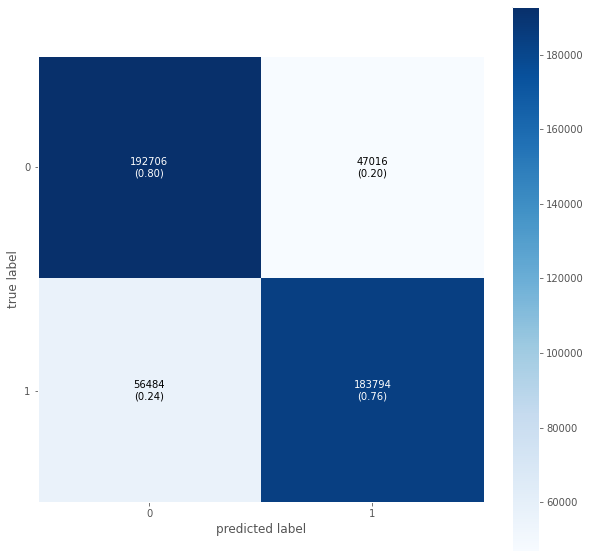

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### ROC CURVE

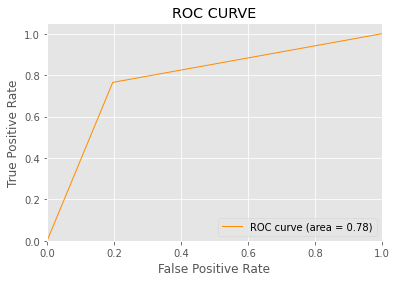

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Live Tweet Analysis

In [ ]:
import tweepy as tw
consumer_key = 'aUowjsNwWKBkYOaB4IfUmuceu'
consumer_secret = 'XWMQ5KugBPRsID9WrxdrsD9R0ESxC5dSAv8ekIDkpow9118mDC'
access_token = '3310223990-eEIqNbhaExlScN92ZcoP8KNTAjNvjiWGyiX4Mnv'
access_token_secret = 'VEbf8Mrq8K2SeCZuBZEskADveOhkP5SZ0a9YCZCGxSXZh'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [ ]:
def clean_live_tweets(text):
  text = cleaning_stopwords(text)
  text = cleaning_punctuations(text)
  text = cleaning_repeating_char(text)
  text = cleaning_email(text)
  text = cleaning_URLs(text)
  text = cleaning_numbers(text)
  return text

Number of Live tweets: 150
Enter Topic name to find sentiments of tweets related to that topic: Modi
5/5 [==============================] - 1s 12ms/step


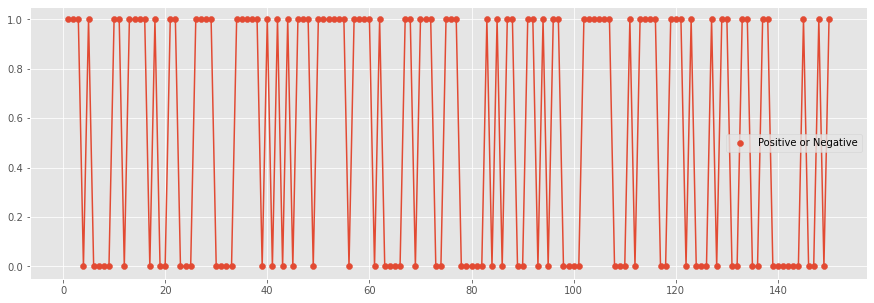

In [ ]:
number_of_tweets = int(input("Number of Live tweets: "))
topic = input('Enter Topic name to find sentiments of tweets related to that topic: ')

try:
    i, tweet_sentiment, x_values = 1, [], []
    for tweet in tw.Cursor(api.search, q=topic + " -filter:retweets", lang="en", ).items(number_of_tweets):
        x_values.append(i)
        tweet_sentiment.append(tweet.text.lower())
        i += 1
    df = pd.DataFrame(tweet_sentiment, columns=['tweets'])
    df['tweets'] = df['tweets'].apply(lambda x: clean_live_tweets(x))
    df['tweets'] = df['tweets'].apply(tokenizer.tokenize)
    df['tweets'] = df['tweets'].apply(lambda x: stemming_on_text(x))
    df['tweets'] = df['tweets'].apply(lambda x: lemmatizer_on_text(x))
    sequences = tok.texts_to_sequences(df.tweets)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
    y_pred = model.predict(sequences_matrix)
    y_pred = (y_pred > 0.5)
    plt.rcParams["figure.figsize"]=15,5
    plt.scatter(x_values, y_pred.tolist(), label="Positive or Negative")
    plt.plot(x_values, y_pred.tolist())
    plt.legend()
    plt.show()
except KeyboardInterrupt:
    print('Tweets Not Extracted')